# 异常检测

就餐饮企业而言，经常会碰到如下问题：
* 如何根据客户的消费记录检测是否为异常刷卡消费？
* 如何检测是否有异常订单？

这一类异常问题可以通过异常检测来解决。在数据的散布图中，离群点一般远离其它数据点。因为离群点的属性值明显偏离期望值或常见的属性值，所以离群点检测也常常是异常检测的一种。
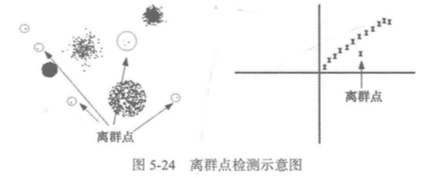

> 异常检测是数据挖掘中重要的一部分，它的任务是发现与大部分其它对象显著不同的对象。大部分数据挖掘方法都将这种差异信息视为噪声而丢弃，但是在一些应用中，罕见的数据可能蕴含着更大的研究价值。

> 异常检测已经被广泛用于电信和信用卡的诈骗检测、贷款审计、电子商务、网络入侵和天气预报等领域。

## 1. 异常的成因与类型

* 异常的成因主要有：
    - 样本属于不同的分类
    - 自然变异
    - 数据测量
    - 收集误差
* 异常的大致分类：
    - 全局、局部离群点(从数据范围): 从整体来看，某些对象没有离群特征，但是从局部来看，却显示了一定的离群性。
    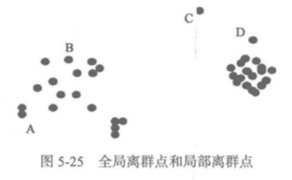
    - 数值型、分类型离群点(从数据类型): 以数据集的属性类型进行划分。
    - 一维、多维离群点(从属性的个数): 一个对象可能有一个或多个属性

## 2. 异常检测方法

- 基于统计：
	* **描述:** 大部分的基于统计的异常检测方法是构建一个概率分布模型，并计算对象符合该模型的概率，把具有低概率的对象视为异常
	* **评估:** 基于统计模型的异常检测方法的前提是必须知道数据集服从什么分布；对于高维度数据，检验效果可能很差
- 基于邻近度：
	* **描述:** 通常可以在数据对象之间定义邻近性度量，把远离大部分点的对象视为异常
	* **评估:** 简单，二维或三维的数据可以做散点图观察；大数据集不适用；对参数选择敏感；具有全局阈值，不能处理具有不同密度区域的数据集
- 基于密度：
	* **描述:** 考虑数据集可能存在不同密度区域这一事实，从基于密度的观点分析，异常是在低密度区域中的对象。一个对象的异常得分是该对象周围密度的逆（逆在这里指：异常的得分和该对象周围的密度相反）
	* **评估:** 给出了对象是异常的定量度量，并且即使数据具有不同的区域也能很好处理；大数据集不适用；参数选择是困难的
- 基于聚类：
	* **描述:** 一种利用聚类检测异常的方法是丢弃远离其他簇的小簇，另一种更系统的方法，首先先聚类所有对象，然后评估对象属于簇的程度(异常得分)
	* **评估:** 基于聚类技术来发展异常可能是高度有效的；聚类算法产生的簇的质量对该算法产生的异常质量影响非常大
   
> 基于统计模型的异常检测方法需要满足统计学原理，如果分布已知，则检测可能非常有效。

> 基于邻近度的异常检测方法比统计学方法更一般、更容易使用，因为确定数据集有意义的邻近度量比确定它的统计分布更容易。

> 基于密度的异常检测与基于邻近度的异常检测密切相关，因为密度常用邻近度定义：一种是定义密度到K个最近邻近的平均距离的倒数，如果该距离小，则密度高；另一种是使用DBSCAN聚类算法，一个对象周围的密度等于该对象指定距离d内对象的个数。

## 3. 基于模型的异常检测方法

通过估计概率分布的参数来建立一个数据模型。如果一个数据对象不能很好地同该模型拟合，即如果它很可能不服从该分布，则它是一个异常点。

### 3.1 一元正态分布中的异常检测

正态分布是统计学中最常用的分布之一。

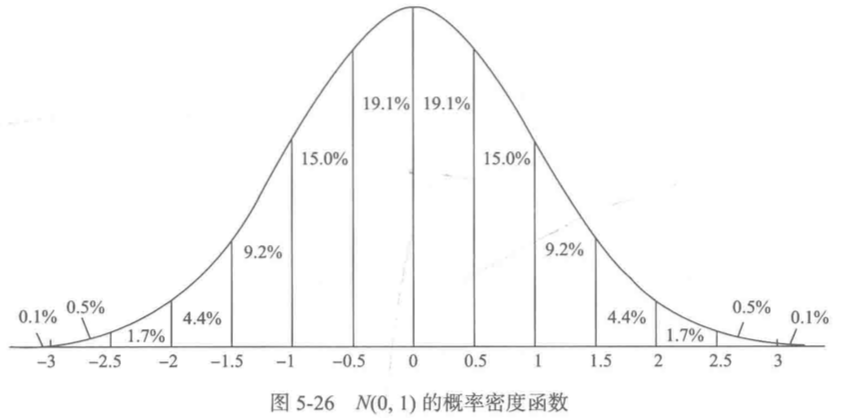
N(0,1)的数据对象出现在该分布的两边尾部的机会很小，因此可以用它作为检测数据对象是否是离群点的基础。数据对象落在3倍标准差中心区域之外的概率仅有0.0027。


### 3.2 混合模型的异常检测

混合模型是一种特殊的统计模型，它使用若干统计分布对数据建模。每一个分布对于一个簇，而每个分布的参数提供对于簇的描述，通常用中心和发散描述。

混合模型将数据看作从不同的概率分布得到的观测值的集合。概率分布可以是任何分布，但是通常是多元正态的，因为这种类型的分布不难理解，容易从数学上进行处理，并且已经证明在许多情况下都能产生好的结果。这种类型的分布可以对椭圆簇建模。

总的来说，混合型数据产生过程为：给定几个类型相同但参数不同的分布，随机地选取一个分布并由它产生一个对象。重复该过程m次，其中m是对象的个数。

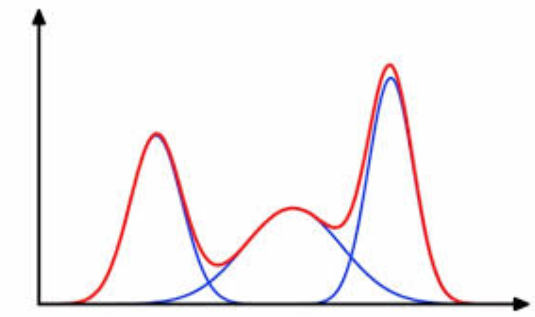
>                             上图显示的是由三个正态分布(蓝色)混合成的一维混合正态分布(红色)

对于混合模型，每个分布描述一个不同的组，即一个不同的簇。通过使用统计方法，可以由数据估计这些分布的参数，从而秒速这些分布。也可以识别哪个对象属于哪个簇。但是混合模型只是给出具体对象属于特定簇的概率。

聚类时，混合模型方法假定数据来自混合概率分布，并且每个簇可以用这个分布之一识别。对于离群检测，用两个分布的混合模型建模，一个分布为正常数据，而另一个为离群点。聚类和离群点检测的目标都是估计分布的参数，以最大化数据的总似然。


## 4. 基于聚类的离群点检测方法

聚类分析用于发现局部相关的对象组，而异常检测用来发现不与其它对象强相关的对象。因此，聚类分析非常自然地可以用于异常检测。

### 4.1 丢弃远离其它簇的小簇
一种利用聚类检测异常的方法是丢弃远离其它簇的小簇。通常这个过程可以简化为丢弃小于某个最小阈值的所有簇。

这个方法可以和其它任何聚类技术一起使用，但是需要最小簇大小和小簇与其它簇之间距离的阈值。而且这种方案对簇个数的选择高度敏感，使用这个方案很难将离群点得分附加到对象上。

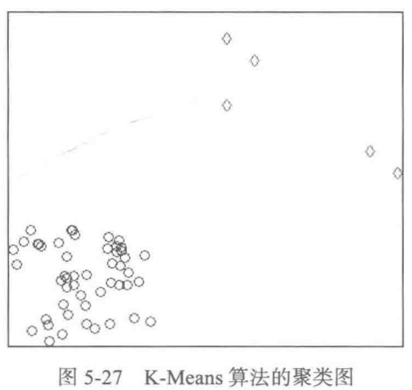

> 在图5-27中，聚类簇数K=2，可以直观地看出其中一个包含5个对象的小簇远离大部分对象，可以视为异常点。

### 4.2 基于原型的聚类

基于原型的聚类这是另一种更系统的方法。首先聚类所有对象，然后评估对象属于簇的程度。在这种方法中，可以用对象到它的簇中心的距离来度量属于簇的程度。特别地，如果删除一个对象导致该目标的显著改进，则可将该对象视为异常点。比如在K均值算法中，删除远离其相关簇中心的对象能显著地改进该簇的误差平方和。

对于基于原型的聚类，主要由两种方法评估对象属于簇的程度：
* 度量对象到簇原型的距离，并用它作为该对象的异常点得分；
* 考虑到簇具有不同的密度，可以度量簇到原型的相对距离，相对距离是点到质心的距离的中位数之比


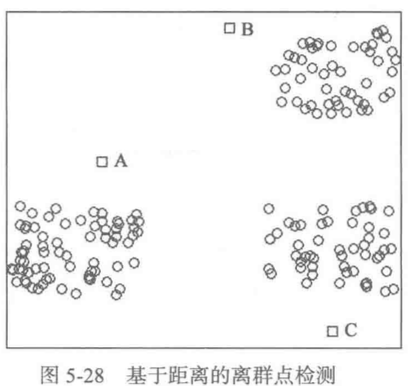
> 如图5-28所示，如果选择聚类簇数K=3，则对象A、B、C应分别属于距离它们最近的簇，但相对于簇内的其它对象，这3个点又分别远离各自的簇，所以有理由怀疑对象A、B、C是异常点

诊断步骤
- 进行聚类。选择聚类算法，将样本集聚为K簇，并找到各簇的质心。
- 计算各对象到它的最近质心的距离
- 计算各对象到它最近质心的相对距离
- 与给定的阈值作比较，如果某对象距离大于该阈值，就认为该对象是异常点

基于聚类的异常检测改进：
* 异常点对初始聚类的影响：通过聚类检测离群点时，离群点会影响聚类结构。为了处理该问题，可以使用的方法：对象聚类，删除异常点，对象再次聚类
* 还有一种更复杂的方法：取一组不能很好地拟合任何簇的特殊对象，这组对象代表潜在的异常点。随着聚类过程的进展，簇在变化。不再强属于任何簇的对象被添加到潜在的异常点集合；测试当前在该集合中的对象，如果它现在强属于一个簇，就可以将它从潜在的异常点集合中移除。聚类过程结束时还留在该集合中的点被分类为异常点，这种方法也不能保证产生最优解，甚至不比前面的简单算法好，在使用相对距离计算异常点得分时，这个问题特别严重。

对象是否被认为是异常点可能依赖于簇的个数。该问题也没有简单的答案。一种策略是对于不同的簇个数重复该分析，另一种方法是找出最小簇，其想法如下：
* 较小的簇倾向于更加凝聚
* 如果存在大量小簇时，一个对象是异常点，则它多半是一个真正的异常点
不利的一面是一组异常点可能形成小簇从而逃避检测

### 4.3 使用K-Means算法聚类消费行为特征数据

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

#参数初始化
inputfile = '../data/consumption_data.xls' #销量及其他属性数据
k = 3 #聚类的类别
threshold = 2 #离散点阈值
iteration = 500 #聚类最大循环次数
data = pd.read_excel(inputfile, index_col = 'Id') #读取数据
data_zs = 1.0*(data - data.mean())/data.std() #数据标准化
data_zs.head()

,R,F,M
Id,,,
1,0.764186,-0.493579,-1.158711
2,-1.024757,-0.630079,0.622527
3,-0.950217,0.871423,-0.341103
4,-1.024757,0.188922,-1.158432
5,-0.204824,-0.357079,1.189868


数据结构：
* ID：客户ID
* R：最近一次消费时间间隔
* F：消费频率
* M：消费总金额

通过K-Means将客户进行分类，业务专家可以根据分类的结果进行分析，最终对不同分组的用户进行描述。

In [2]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) #分为k类，并发数4
model.fit(data_zs) #开始聚类

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [3]:
#标准化数据及其类别
r = pd.concat([data_zs, pd.Series(model.labels_, index = data.index)], axis = 1)  #每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头
r.head()

,R,F,M,聚类类别
Id,,,,
1,0.764186,-0.493579,-1.158711,0
2,-1.024757,-0.630079,0.622527,0
3,-0.950217,0.871423,-0.341103,2
4,-1.024757,0.188922,-1.158432,0
5,-0.204824,-0.357079,1.189868,0


In [4]:
r1 = pd.Series(model.labels_).value_counts() # 统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) # 找出聚类中心

# 横向连接（0是纵向），得到聚类中心对应的类别下的数目
result = pd.concat([r2, r1], axis = 1)
result.columns = list(data.columns) + [u'类别数目']
print(u'计算得到的各类中心点和类别数目')
print(result)

计算得到的各类中心点和类别数目
          R         F         M  类别数目
0 -0.149353 -0.658893 -0.271780   559
1  3.455055 -0.295654  0.449123    40
2 -0.160451  1.114802  0.392844   341


In [5]:
norm = []
for i in range(k): #逐一处理
    norm_tmp = r[['R', 'F', 'M']][r[u'聚类类别'] == i]-model.cluster_centers_[i]
    norm_tmp = norm_tmp.apply(np.linalg.norm, axis = 1) #求出绝对距离
    norm.append(norm_tmp/norm_tmp.median()) #求相对距离并添加

norm = pd.concat(norm) #合并

In [6]:
norm.head()

Id
1    1.205157
2    1.174957
4    1.414587
5    1.401859
6    0.912938
dtype: float64

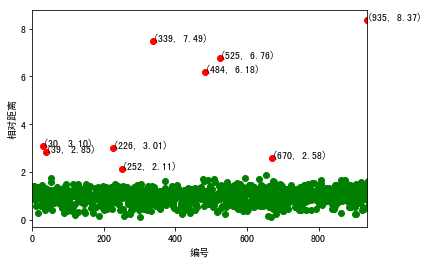

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
norm[norm <= threshold].plot(style = 'go') #正常点

discrete_points = norm[norm > threshold] #离群点
discrete_points.plot(style = 'ro')

for i in range(len(discrete_points)): #离群点做标记
    id = discrete_points.index[i]
    n = discrete_points.iloc[i]
    plt.annotate('(%s, %0.2f)'%(id, n), xy = (id, n), xytext = (id, n))

plt.xlabel(u'编号')
plt.ylabel(u'相对距离')
plt.show()

> 通过计算各个样本到各自聚类中心的距离，分析离群样本，得到上示距离误差图。如果距离阈值设置为2，那么所给的数据中有9个离散点，在聚类的时候这些数据应该剔除。

## 作业

1. 通过分析某城市内各个基站的：工作日上班时间人均停留时间、凌晨人均停留时间、周末人均停留时间、日均人流量，来对基站进行离群点分析。（数据文件为：../data/business_circle.xls）